In [1]:
import librosa
import librosa.display
#from scipy import signal
#from scipy import misc
import scipy
import numpy as np
import matplotlib.pyplot as plt
import math
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from scipy.io import wavfile
import sounddevice as sd
from sklearn import decomposition

## Ten Clips that were labeled for Screaming Piha vocalizations 

In [2]:
piha_templates_full = pd.read_csv("Piha_Labels.csv")

In [3]:
piha_templates_full

,IN FILE,CLIP LENGTH,OFFSET,DURATION,SAMPLING RATE,LABEL,TIME SPENT
0,Lipaugus-vociferans-63618.wav,32.6160,1.5448,2.1297,16000,screaming-piha,180.948
1,Lipaugus-vociferans-63618.wav,32.6160,10.1638,0.8498,16000,screaming-piha,180.952
2,Lipaugus-vociferans-63618.wav,32.6160,0.5549,0.9999,16000,screaming-piha,180.951
3,Lipaugus-vociferans-63618.wav,32.6160,8.7739,0.8399,16000,screaming-piha,180.952
4,Lipaugus-vociferans-63618.wav,32.6160,12.6335,1.9997,16000,screaming-piha,180.952
...,...,...,...,...,...,...,...
229,Lipaugus-vociferans-73778.wav,63.8955,55.1711,0.3700,44100,screaming-piha,302.216
230,Lipaugus-vociferans-73778.wav,63.8955,56.0411,0.5299,44100,screaming-piha,302.216
231,Lipaugus-vociferans-73778.wav,63.8955,56.8310,0.5100,44100,screaming-piha,302.216
232,Lipaugus-vociferans-73778.wav,63.8955,61.0007,2.1599,44100,screaming-piha,302.216


In [4]:
# Basic statistics related to the duration of the annotations that were made
annotation_duration_statistics(piha_templates_full)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,234,1.87,1.080373,0.673036,0.1906,0.52,0.7892,1.7775,3.1199


### Focusing on the main "Pee-Haw!" Vocalization 

In [5]:
longer_piha_calls = piha_templates_full[(piha_templates_full["DURATION"] > 1.75) & (piha_templates_full["DURATION"] < 2)]
# Basic statistics with the reduced set
annotation_duration_statistics(longer_piha_calls)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,36,1.87,1.882644,0.067569,1.7699,1.831775,1.87005,1.9349,1.9997


In [6]:
longer_piha_calls.reset_index(drop=True,inplace=False)

,IN FILE,CLIP LENGTH,OFFSET,DURATION,SAMPLING RATE,LABEL,TIME SPENT
0,Lipaugus-vociferans-63618.wav,32.61600,12.6335,1.9997,16000,screaming-piha,180.952
1,Lipaugus-vociferans-63618.wav,32.61600,30.2213,1.8698,16000,screaming-piha,180.953
2,Lipaugus-vociferans-64603.wav,6.84408,4.0940,1.8357,22050,screaming-piha,85.212
3,Lipaugus-vociferans-64950.wav,13.55760,9.4938,1.8712,44100,screaming-piha,107.483
4,Lipaugus-vociferans-65113.wav,54.17800,2.4249,1.7699,44100,screaming-piha,345.379
5,Lipaugus-vociferans-65113.wav,54.17800,34.3337,1.9499,44100,screaming-piha,345.381
6,Lipaugus-vociferans-66186.wav,70.63510,5.6646,1.9299,22050,screaming-piha,322.030
7,Lipaugus-vociferans-66186.wav,70.63510,1.7849,1.8998,22050,screaming-piha,322.030
8,Lipaugus-vociferans-66186.wav,70.63510,9.9743,1.9699,22050,screaming-piha,322.030
9,Lipaugus-vociferans-66186.wav,70.63510,14.5640,1.8199,22050,screaming-piha,322.030


In [7]:
# Creating a master wav file that contains all of the vocalizations in one file. This will be helpful for testing
# out which method is the most effective.

piha_audio_path = "/home/jacob/Desktop/EngineersForExploration/Bioacoustics/PyHa/ScreamingPiha/"
# will downsample all of the audioclips to reduce the sample space for just the Piha calls
final_sr = 11000
combined_templates = np.zeros(final_sr)
# Initializing a numpy array that will store all of the signals
template_length = 2 * final_sr
for call in longer_piha_calls.index:
    # Reading in the filename
    clip = longer_piha_calls["IN FILE"][call]
    # reading in the start of the call of interest
    start = longer_piha_calls["OFFSET"][call]
    # reading in the end of the call of interest
    end = start + longer_piha_calls["DURATION"][call]
    # reading in the audio clip
    sr, signal = wavfile.read(piha_audio_path+clip)
    #print("Start Shape",signal.shape)
    rate_ratio = final_sr/sr
    # converting to mono if necessary
    if len(signal.shape) == 2:
        signal = signal.sum(axis=1) / 2
    # Option to playback the audio
    #sd.play(signal[int(start*sr):int(end*sr)],sr)
    #sd.wait()
    # downsampling by rate_ratio. The sound quality on these calls becomes awful after downsampling.
    signal = scipy_signal.resample(signal[int(start*sr):int(end*sr)], int(len(signal[int(start*sr):int(end*sr)])*rate_ratio))
    #print("Post-Downsample Shape",signal.shape)
    # Padding with zeros to make the signals uniform. Could consider adding AWGN here, but this is good for now
    
    signal_sample_count = signal.shape[0]
    zero_padding = np.zeros(template_length-signal_sample_count + (final_sr*2))
    signal = np.append(signal,zero_padding)
    #print("Final Shape",signal.shape,"\n")
    # adding the signal onto the template
    combined_templates = np.append(combined_templates,signal)
    
# Writing out the test calls
#wavfile.write("test_piha_calls.wav",final_sr,combined_templates)

/home/jacob/anaconda3/envs/species-id/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(0.0, 20.0)

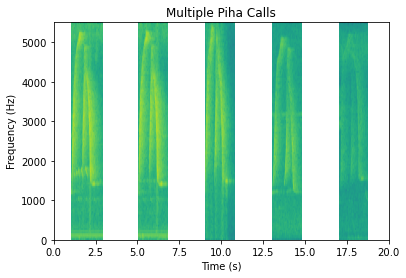

In [8]:
# Visualizing what the calls look like
plt.specgram(combined_templates,Fs=final_sr,NFFT=256,noverlap=128,window=np.hanning(256))
plt.title("Multiple Piha Calls")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.xlim([0,20])

## Averaging Method
#### Suggested by Ryan Kastner as well as used to find Piha calls in this paper: 
https://www.sciencedirect.com/science/article/abs/pii/S1574954115001934

In [9]:
piha_audio_path = "/home/jacob/Desktop/EngineersForExploration/Bioacoustics/PyHa/ScreamingPiha/"
# will downsample all of the audioclips to reduce the sample space for just the Piha calls
final_sr = 11000
# Initializing a numpy array that will store all of the signals
template_length = 2 * final_sr
average_template = np.zeros(template_length)
for call in longer_piha_calls.index:
    # Reading in the filename
    clip = longer_piha_calls["IN FILE"][call]
    # reading in the start of the call of interest
    start = longer_piha_calls["OFFSET"][call]
    # reading in the end of the call of interest
    end = start + longer_piha_calls["DURATION"][call]
    # reading in the audio clip
    sr, signal = wavfile.read(piha_audio_path+clip)
    #print("Start Shape",signal.shape)
    rate_ratio = final_sr/sr
    # converting to mono if necessary
    if len(signal.shape) == 2:
        signal = signal.sum(axis=1) / 2
    # Option to playback the audio
    #sd.play(signal[int(start*sr):int(end*sr)],sr)
    #sd.wait()
    # downsampling by rate_ratio. The sound quality on these calls becomes awful after downsampling.
    signal = scipy_signal.resample(signal[int(start*sr):int(end*sr)], int(len(signal[int(start*sr):int(end*sr)])*rate_ratio))
    #print("Post-Downsample Shape",signal.shape)
    # Padding with zeros to make the signals uniform. Could consider adding AWGN here, but this is good for now
    
    signal_sample_count = signal.shape[0]
    zero_padding = np.zeros(template_length-signal_sample_count)
    signal = np.append(signal,zero_padding)
    #print("Final Shape",signal.shape,"\n")
    # adding the signal onto the template
    average_template = average_template + signal
    
# averaging together the calls into a template
average_template = average_template/longer_piha_calls.shape[0]

Text(0.5, 0, 'Time (s)')

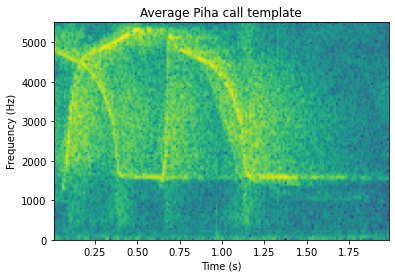

In [10]:
# If you want to listen to it. SOUND WARNING VERY LOUD
#sd.play(average_template,final_sr)
#sd.wait()
# Writing out the template
#wavfile.write("average_template.wav",final_sr,average_template)
# Building a a spectrogram
# Going off the recommended lower NFFT value to emphasize the temporal information in the audio
plt.specgram(average_template,Fs=final_sr,NFFT=256,noverlap=128,window=np.hanning(256))
plt.title("Average Piha call template")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")

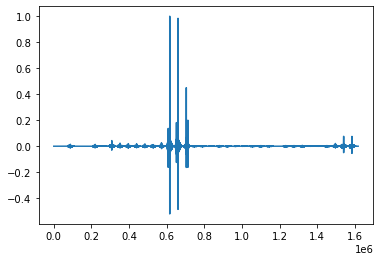

In [11]:
cross_correlation_average_template_1d = scipy.signal.correlate(average_template,combined_templates)
plt.plot(cross_correlation_average_template_1d/max(cross_correlation_average_template_1d))

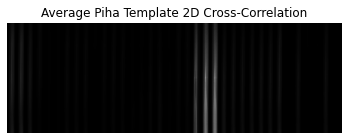

In [12]:
# This whole process is extraordinarily slow
# Converting the average piha template into a spectrogram
# We could play around with the different variables of the short time fourier transform
average_template_spec = np.abs(librosa.stft(average_template))
# Converting the clip with all of the call into a spectrogram
S = np.abs(librosa.stft(combined_templates))
cross_correlation_average_template_2d = scipy.signal.correlate2d(S,average_template_spec,boundary='symm',mode='same')
fig, ax_corr = plt.subplots()
ax_corr.imshow(cross_correlation_average_template_2d,cmap='gray')
ax_corr.set_title('Average Piha Template 2D Cross-Correlation')
ax_corr.set_axis_off()

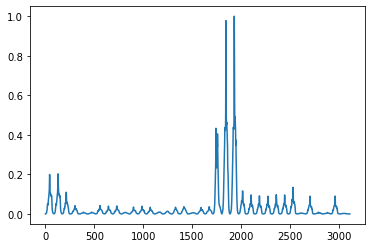

In [13]:
corr_reduced_max1 = np.amax(cross_correlation_average_template_2d,axis=0)
plt.plot(corr_reduced_max1/max(corr_reduced_max1))

## Principal Component Analysis "Eigencall" method 
### Suggested by Nathan Hui

In [14]:
piha_audio_path = "/home/jacob/Desktop/EngineersForExploration/Bioacoustics/PyHa/ScreamingPiha/"
# will downsample all of the audioclips to reduce the sample space for just the Piha calls
final_sr = 11000
# Initializing a numpy array that will store all of the signals
template_length = 2 * final_sr
average_template = np.zeros(template_length)
piha_call_matrix = np.zeros(template_length)
matrix_start = False
for call in longer_piha_calls.index:
    # Reading in the filename
    clip = longer_piha_calls["IN FILE"][call]
    # reading in the start of the call of interest
    start = longer_piha_calls["OFFSET"][call]
    # reading in the end of the call of interest
    end = start + longer_piha_calls["DURATION"][call]
    # reading in the audio clip
    sr, signal = wavfile.read(piha_audio_path+clip)
    #print("Start Shape",signal.shape)
    rate_ratio = final_sr/sr
    # converting to mono if necessary
    if len(signal.shape) == 2:
        signal = signal.sum(axis=1) / 2
    # Option to playback the audio
    #sd.play(signal[int(start*sr):int(end*sr)],sr)
    #sd.wait()
    # downsampling by rate_ratio. The sound quality on these calls becomes awful after downsampling.
    signal = scipy_signal.resample(signal[int(start*sr):int(end*sr)], int(len(signal[int(start*sr):int(end*sr)])*rate_ratio))
    #print("Post-Downsample Shape",signal.shape)
    # Padding with zeros to make the signals uniform. Could consider adding AWGN here, but this is good for now
    
    signal_sample_count = signal.shape[0]
    zero_padding = np.zeros(template_length-signal_sample_count)
    signal = np.append(signal,zero_padding)
    #print("Final Shape",signal.shape,"\n")
    # adding the signal onto the template
    if matrix_start == False:
        piha_call_matrix = signal
        matrix_start = True
    else:
        piha_call_matrix = np.vstack((piha_call_matrix,signal))
print(piha_call_matrix.shape)

(36, 22000)


In [15]:
# Performing PCA, 10 was an arbitrary number here
pca = decomposition.PCA(n_components=10, whiten=True)
pca.fit(piha_call_matrix)

PCA(n_components=10, whiten=True)

Text(0.5, 0, 'Time (s)')

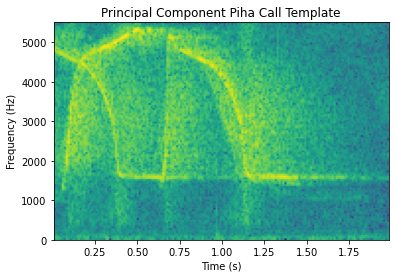

In [16]:
# Comes out to be very similar to the template average
plt.specgram(pca.mean_,Fs=final_sr,NFFT=256,noverlap=128,window=np.hanning(256))
plt.title("Principal Component Piha Call Template")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")

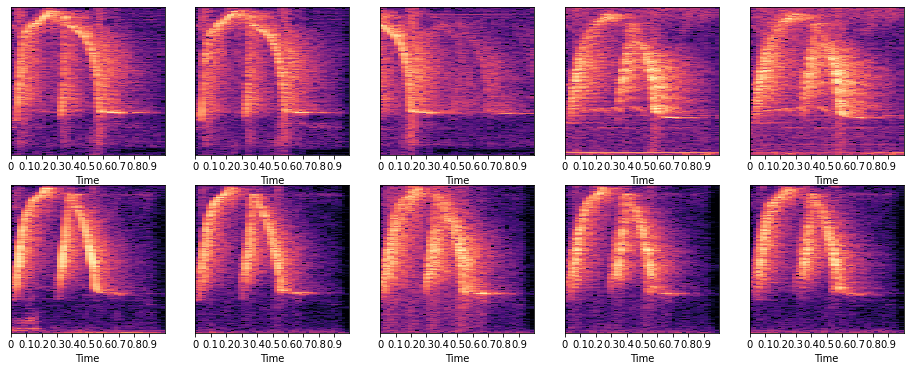

In [17]:
# May need to get more labels to do proper PCA Analysis
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(pca.components_[i])),ref=np.max), x_axis='time', ax=ax)

### Going to see if doing the STFT first changes the PCA 

In [27]:
piha_audio_path = "/home/jacob/Desktop/EngineersForExploration/Bioacoustics/PyHa/ScreamingPiha/"
# will downsample all of the audioclips to reduce the sample space for just the Piha calls
final_sr = 11000
# Initializing a numpy array that will store all of the signals
template_length = 2 * final_sr
average_template = np.zeros(template_length)
piha_call_matrix = np.zeros(template_length)
matrix_start = False
for call in longer_piha_calls.index:
    # Reading in the filename
    clip = longer_piha_calls["IN FILE"][call]
    # reading in the start of the call of interest
    start = longer_piha_calls["OFFSET"][call]
    # reading in the end of the call of interest
    end = start + longer_piha_calls["DURATION"][call]
    # reading in the audio clip
    sr, signal = wavfile.read(piha_audio_path+clip)
    #print("Start Shape",signal.shape)
    rate_ratio = final_sr/sr
    # converting to mono if necessary
    if len(signal.shape) == 2:
        signal = signal.sum(axis=1) / 2
    # Option to playback the audio
    #sd.play(signal[int(start*sr):int(end*sr)],sr)
    #sd.wait()
    # downsampling by rate_ratio. The sound quality on these calls becomes awful after downsampling.
    signal = scipy_signal.resample(signal[int(start*sr):int(end*sr)], int(len(signal[int(start*sr):int(end*sr)])*rate_ratio))
    #print("Post-Downsample Shape",signal.shape)
    # Padding with zeros to make the signals uniform. Could consider adding AWGN here, but this is good for now
    
    signal_sample_count = signal.shape[0]
    zero_padding = np.zeros(template_length-signal_sample_count)
    signal = np.append(signal,zero_padding)
    spectrogram = np.abs(librosa.stft(signal))
    #print("Before:",spectrogram.shape)
    spectrogram = spectrogram.reshape((44075,))
    #print("After:",spectrogram.shape)
    if matrix_start == False:
        piha_call_matrix = spectrogram
        matrix_start = True
    else:
        piha_call_matrix = np.vstack((piha_call_matrix,spectrogram))
print(piha_call_matrix.shape)

(36, 44075)


In [22]:
pca = decomposition.PCA(n_components=10, whiten=True)
pca.fit(piha_call_matrix)

PCA(n_components=10, whiten=True)

Text(0.5, 0, 'Time (s)')

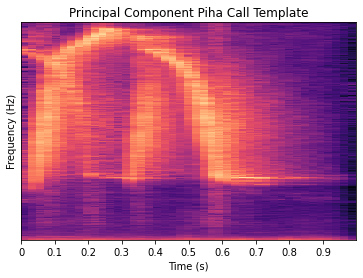

In [26]:
# Comes out to be very similar to the template average
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(pca.mean_.reshape((1025,43)),ref=np.max), x_axis='time', ax=ax)
plt.title("Principal Component Piha Call Template")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")

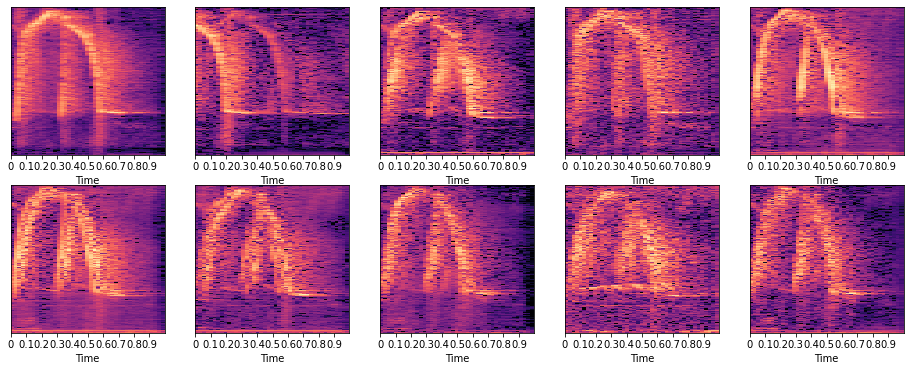

In [31]:
# May need to get more labels to do proper PCA Analysis
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    librosa.display.specshow(librosa.amplitude_to_db(pca.components_[i].reshape((1025,43)),ref=np.max), x_axis='time', ax=ax)